# Sampling Methods

The general question we want to figure out:

According to Chapter 5, if we want to apply Bayesian method for the posterior distribution

$$p(w | x) \propto p(x|w)p(w)$$

in which the likelihood $p(x | w)$ is complicated with respect to $w$ so the posterior distribution cannot be written out directly. 

In Chapter 5, the method of Laplace approximation is used to solve the problem through find out the mode and variance with first and second derivatives of $w$ and apply a Gaussian distribution to approximate the unknown distribution. 

Laplace approximation is suitable when the posterior distribution is uni-mode and symmetric. 

But sometimes, the target posterior distribution may not satisfy this condition. Sampling methods could solve the related problems.

### The neural network model we use for this chapter

$$y(\boldsymbol{x}) = w_{30} + \sigma(\boldsymbol{x} w_1) w_{31} + \sigma(\boldsymbol{x} w_2) w_{32}$$

where $\boldsymbol{x} \in \mathbb{R}^{n \times 3}$ and $\boldsymbol{x}[:,0] = \boldsymbol{1}$, $w_1 \in \mathbb{R}^3$, $w_2 \in \mathbb{R}^3$, $w_3^T = [w_{30}, w_{31}, w_{32}]$, $y \in \mathbb{R}^n$

### The problem we try to solve (True Model)
$$t = sin(2\pi x) + \epsilon$$

where $\epsilon \sim N(0, 0.2)$, $x \sim [0,1]$

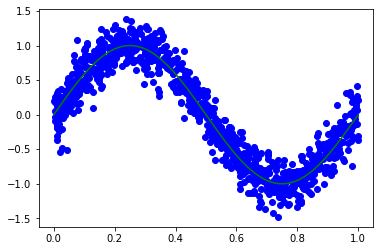

In [181]:
import numpy as np
import matplotlib.pyplot as plot

#true line
N = 1000
xtrue=np.arange(0,1, 0.0000001)
ytrue= np.sin(2*np.pi*xtrue)
x = np.random.rand(N)
error = np.random.normal(0, 0.2, N)
y = np.sin(x*2*np.pi)+error
#print(x, error, y)

plot.scatter(x, y, c = "blue")
plot.plot(xtrue, ytrue, c = "green")
plot.show()

In [182]:
#split training set and test set

xindex = np.random.rand(len(x)) < 0.8
#print(xindex)
xtrain = x[xindex]
xtest = x[~xindex]
ytrain = y[xindex]
ytest = y[~xindex]

In [183]:
x0 = np.ones(len(xtrain))
x2 = np.array([x0, xtrain, xtrain**2]).T

x0test = np.ones(len(xtest))
x2test = np.array([x0test, xtest, xtest**2]).T

x0true = np.ones(len(xtrue))
x2true = np.array([x0true, xtrue, xtrue**2]).T
print(x2.shape)
print(ytrain.shape)

(792, 3)
(792,)


In [184]:
from torch.utils.data import DataLoader, TensorDataset
batchsize = 200
x2 = torch.from_numpy(x2).type(torch.FloatTensor)
ytrain = torch.from_numpy(ytrain).reshape(-1,1).type(torch.FloatTensor)
dataset = TensorDataset(x2, ytrain)

train_loader = DataLoader(dataset, batch_size=batchsize, shuffle=True)

x2test = torch.from_numpy(x2test).type(torch.FloatTensor)
x2true = torch.from_numpy(x2true).type(torch.FloatTensor)
ytest = torch.from_numpy(ytest).reshape(-1,1).type(torch.FloatTensor)

In [192]:
import torch
import torch.nn as nn

class NNmodel(nn.Module):
    def __init__(self, inputsize, hiddensize, outputsize):
        super(NNmodel, self).__init__()
        self.layer1 = nn.Linear(inputsize, hiddensize)
        self.act = nn.Sigmoid()
        self.hiddenlayer = nn.Linear(hiddensize, hiddensize)
        self.layer2 = nn.Linear(hiddensize, outputsize)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.act(x)
        #x = self.hiddenlayer(x)
        #x = self.act(x)
        #x = self.hiddenlayer(x)
        #x = self.act(x)
        x = self.layer2(x)
        return x
    
inputsize = x2.shape[1]
hiddensize = 2
outputsize = 1

model = NNmodel(inputsize, hiddensize, outputsize)

In [193]:
import torch.optim as optim

learningrate = 0.01
numepochs = 500

mseloss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learningrate)

for epoch in range(numepochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        
        outputs = model(inputs)
        
        loss = mseloss(outputs, targets)
        
        loss.backward()
        
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{numepochs}], Loss: {loss.item():.4f}')
        
print('Training finished')

Epoch [1/500], Loss: 0.4666
Epoch [2/500], Loss: 0.5487
Epoch [3/500], Loss: 0.5003
Epoch [4/500], Loss: 0.4473
Epoch [5/500], Loss: 0.5710
Epoch [6/500], Loss: 0.4996
Epoch [7/500], Loss: 0.5640
Epoch [8/500], Loss: 0.4966
Epoch [9/500], Loss: 0.4641
Epoch [10/500], Loss: 0.5626
Epoch [11/500], Loss: 0.5561
Epoch [12/500], Loss: 0.4458
Epoch [13/500], Loss: 0.4674
Epoch [14/500], Loss: 0.4692
Epoch [15/500], Loss: 0.4334
Epoch [16/500], Loss: 0.4488
Epoch [17/500], Loss: 0.4606
Epoch [18/500], Loss: 0.5124
Epoch [19/500], Loss: 0.4180
Epoch [20/500], Loss: 0.4596
Epoch [21/500], Loss: 0.3872
Epoch [22/500], Loss: 0.3933
Epoch [23/500], Loss: 0.4261
Epoch [24/500], Loss: 0.3922
Epoch [25/500], Loss: 0.3672
Epoch [26/500], Loss: 0.4279
Epoch [27/500], Loss: 0.4073
Epoch [28/500], Loss: 0.3766
Epoch [29/500], Loss: 0.3420
Epoch [30/500], Loss: 0.3107
Epoch [31/500], Loss: 0.3196
Epoch [32/500], Loss: 0.2973
Epoch [33/500], Loss: 0.2915
Epoch [34/500], Loss: 0.2989
Epoch [35/500], Loss: 0

Epoch [311/500], Loss: 0.1212
Epoch [312/500], Loss: 0.1362
Epoch [313/500], Loss: 0.1292
Epoch [314/500], Loss: 0.1339
Epoch [315/500], Loss: 0.1243
Epoch [316/500], Loss: 0.1028
Epoch [317/500], Loss: 0.1295
Epoch [318/500], Loss: 0.1183
Epoch [319/500], Loss: 0.1023
Epoch [320/500], Loss: 0.1133
Epoch [321/500], Loss: 0.1164
Epoch [322/500], Loss: 0.0959
Epoch [323/500], Loss: 0.1314
Epoch [324/500], Loss: 0.1037
Epoch [325/500], Loss: 0.1303
Epoch [326/500], Loss: 0.1380
Epoch [327/500], Loss: 0.1204
Epoch [328/500], Loss: 0.1121
Epoch [329/500], Loss: 0.1044
Epoch [330/500], Loss: 0.1116
Epoch [331/500], Loss: 0.1062
Epoch [332/500], Loss: 0.1241
Epoch [333/500], Loss: 0.1119
Epoch [334/500], Loss: 0.1217
Epoch [335/500], Loss: 0.0881
Epoch [336/500], Loss: 0.1023
Epoch [337/500], Loss: 0.1146
Epoch [338/500], Loss: 0.1073
Epoch [339/500], Loss: 0.1107
Epoch [340/500], Loss: 0.1131
Epoch [341/500], Loss: 0.1028
Epoch [342/500], Loss: 0.1050
Epoch [343/500], Loss: 0.1125
Epoch [344

In [194]:

model.eval()
with torch.no_grad():
    #test_loss = 0.0
    predy = model(x2test)
    predytrue = model(x2true)
    testloss = mseloss(predy, ytest)

print(testloss)

predy = predy.data.numpy()
predytrue = predytrue.data.numpy()

tensor(0.1025)


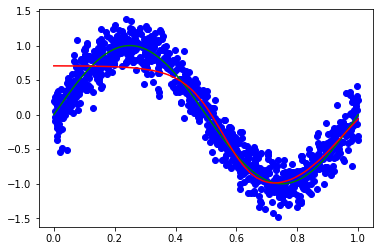

In [195]:
plot.scatter(x, y, c = "blue")
plot.plot(xtrue, ytrue, c = "green")
plot.plot(xtrue, predytrue, c = "red")
plot.show()

In [196]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'Parameter name: {name}, Shape: {param.shape}')
        print(param.data)

Parameter name: layer1.weight, Shape: torch.Size([2, 3])
tensor([[-3.3866,  7.0988,  8.1090],
        [-3.2366,  3.1846,  4.1380]])
Parameter name: layer1.bias, Shape: torch.Size([2])
tensor([-2.9610, -3.3420])
Parameter name: hiddenlayer.weight, Shape: torch.Size([2, 2])
tensor([[-0.1719,  0.3804],
        [-0.0170,  0.2366]])
Parameter name: hiddenlayer.bias, Shape: torch.Size([2])
tensor([ 0.6072, -0.4246])
Parameter name: layer2.weight, Shape: torch.Size([1, 2])
tensor([[-1.9796,  1.7859]])
Parameter name: layer2.bias, Shape: torch.Size([1])
tensor([0.7076])


For statistians, the question becomes how sure are we about these parameters? If we try to analyze the properties of these parameters, we may need to know the distribution of these parameters or at least expectations and variances.

Suppose $D = \{t, \boldsymbol{x}\}$
$$p(w | D) \propto p(D|w) p(w)$$
Accodring to the model, $D|w \sim N(y(\boldsymbol{x}), \sigma^2)$
$$P(D|w) = \frac{1}{(2 \pi \sigma^2)^{n/2}}\exp{(-\frac{1}{2}\sum_{i=1}^n (t_i - y(\boldsymbol{x}_i))^2/\sigma^2)}$$

denote $\tilde{p}(w) \equiv p(D|w) p(w)$ so that $p(w | D) = \frac{1}{Z_p}\tilde{p}(w)$ in which $Z_p = \int \tilde{p}(w)dw$

The problem is the posterior distribution is not a typical distribution, like Guassian, binomial, gamma, etc. And one method to deal with it is try to sample units from the target distribution and use the samples to estimate mean, variance, etc.
$$\bar{w} = \frac{1}{L}\sum_{l}^Lw^{(l)}$$
$$Var(w) = \frac{1}{L-1}\sum_{l}^L (w^{(l)} - \bar{w})^2$$

This chapter introduces several methods to do this sampling.

## Basic Sampling methods
### For standard distributions
If we know the exact target pdf of the distribution we want to transform to, all distributions could be transformed from uniform distribution.

Suppose $z$ follows a standard uniform distribution. Once observations are sampled from $p(z)$, a function $f(\cdot)$ could be used for distribution transformation. 

The way to find the function $f(\cdot)$:

The change of the distribution pdf follows
$$p(y) = p(z)|\frac{dz}{dy}|$$

in which $p(z) = 1$, $\int_0^z p(\hat{z})d\hat{z}=z$
The corresponding cumulative distribution function could be represented with corresponding probabilities $z$ that
$$z = h(y) \equiv \int_{-\infty}^y p(\hat{y})d\hat{y}$$
thus $f(\cdot) = h^{-1}(\cdot)$

The exact process is that 1) find out the target probability density function; 2) write down the integration of the pdf; 3) deduct the reverse function; 4) put the uniform distribution sample into the reverse function.

(array([ 98., 113.,  99., 108.,  88., 111., 107.,  91.,  86.,  99.]),
 array([0.00140861, 0.10108743, 0.20076625, 0.30044507, 0.40012389,
        0.49980272, 0.59948154, 0.69916036, 0.79883918, 0.898518  ,
        0.99819682]),
 <BarContainer object of 10 artists>)

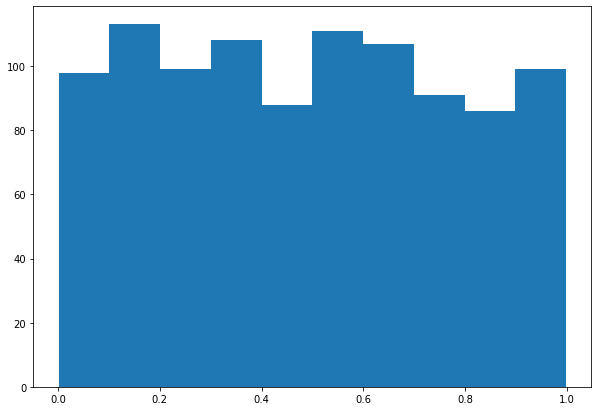

In [223]:
z = np.random.rand(1000)

fig, axs = plot.subplots(
                        figsize =(10, 7))
 
axs.hist(z, bins = 10)

#### Transform to exponential distribution

The pdf is
$$p(y) = \lambda exp(-\lambda y)$$
The CDF is 
$$h(y) = 1 - exp(-\lambda y) = z$$
The reverse function is
$$y = -\lambda^{-1}log(1-z)$$

(array([475., 264., 120.,  55.,  41.,  18.,  20.,   1.,   2.,   4.]),
 array([1.40960689e-03, 6.33088805e-01, 1.26476800e+00, 1.89644720e+00,
        2.52812640e+00, 3.15980560e+00, 3.79148480e+00, 4.42316400e+00,
        5.05484319e+00, 5.68652239e+00, 6.31820159e+00]),
 <BarContainer object of 10 artists>)

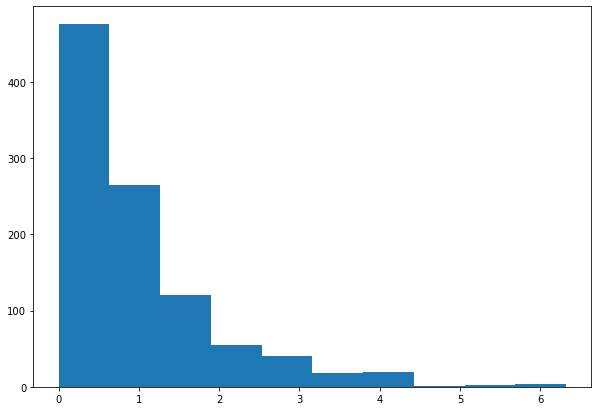

In [224]:
#transform to expoenential distribution
lambda1 = 1
y = -1/lambda1*np.log(1 - z)
fig, axs = plot.subplots(
                        figsize =(10, 7))
 
axs.hist(y, bins = 10)

(array([  5.,  35., 114., 201.,  63., 137., 193.,  39.,  10.,   4.]),
 array([-2.17407445, -1.70790485, -1.24173526, -0.77556566, -0.30939606,
         0.15677353,  0.62294313,  1.08911273,  1.55528232,  2.02145192,
         2.48762152]),
 <BarContainer object of 10 artists>)

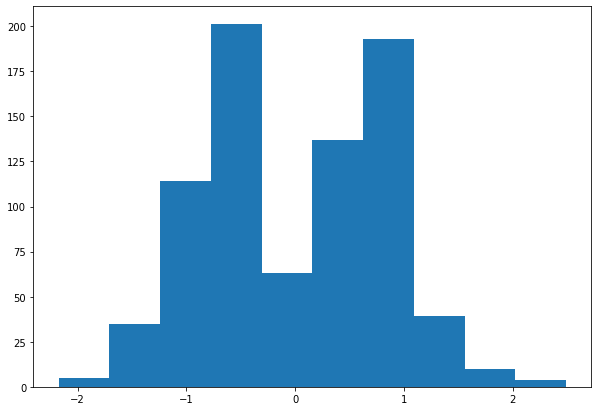

In [225]:
# For two-dimension normal distribution
z = (z-0.5)*2

z2 = np.random.rand(1000)

z2 = (z2-0.5)*2
#drop the observations that z**2 + z2**2 > 1
index = (z**2 + z2**2) <= 1
z = z[index]
z2 = z2[index]
#define the standard variance


r2 = z**2 + z2**2

#Then do the transformation, but this may have some problem since the log domain should be greater than 0
y1 = z*((-2)*np.log(np.abs(z))/r2)**0.5
y2 = z2*((-2)*np.log(np.abs(z2))/r2)**0.5

fig, axs = plot.subplots(
                        figsize =(10, 7))
 
axs.hist(y1, bins = 10)

#### Rejection sampling
Start from here, we do not need the target pdf $p(z)$ fully, we only need the direct proportional part, $\tilde{p}(z)$ that $p(z) = \frac{1}{Z_p} \tilde{p}(z)$.

And in the rest part a proposal distribution $q(z)$ is introduced

For rejection sampling, the sampling process is straightforward. 

1. Choose a proposal distribution $q(z)$ (if you do not know the range of the targer random variable, choose Gaussian, otherwise, choose uniform)
2. Select a scalar $k$ that $k q(z) \geq \tilde{p}(z)$
3. Sample $z_0$ from $q(z)$
4. Sample $u_0$ from uniform distribution $[0, kq(z_0)]$
5. If $u_0 > \tilde{p}(z_0)$, reject $z_0$ and do the next sampling, otherwise, keep the $z_0$ and do the next sampling.
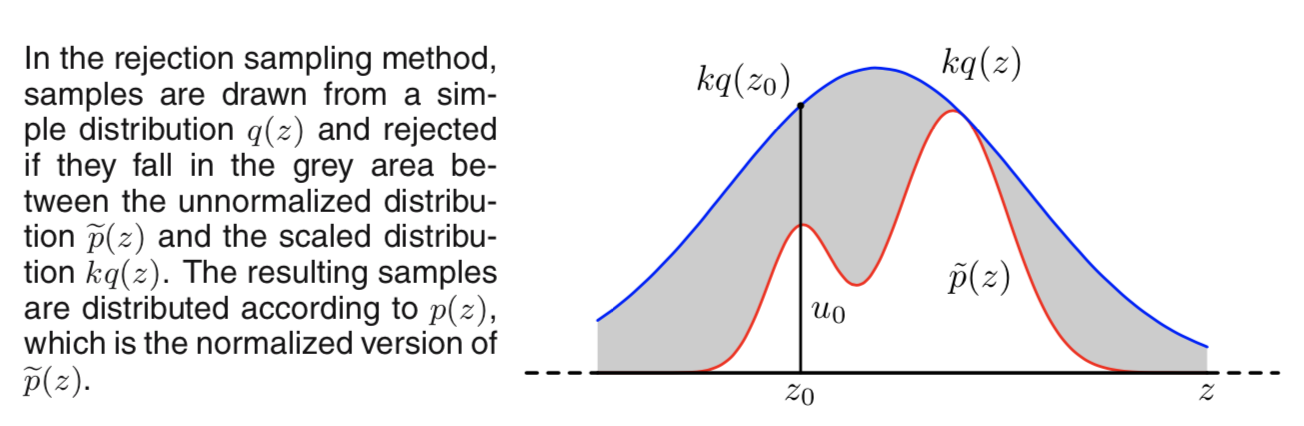

The hardest part of rejection sampling is to select the scalar $k$.
If $k$ is small, we cannot ensure $kq(z) \geq \tilde{p}(z)$
If $k$ is big, the probability of rejection will be very high
$$p(accept) = \int \{\tilde{p}(z)/(kq(z)) \}q(z)dz = \frac{1}{k}\int \tilde{p}(z)dz$$

#### Importance Sampling
do not need to select $k$ but focus on the correponding statistics, like mean, variance, etc.

$$E[f] \approx \sum_{l=1}^L p(z^{(l)})f(z^{(l)})$$

The idea of importance sampling is to transform the unknown $p(z^{(l)})$ to some known ratio such that $p(z^{(l)}) = \frac{\tilde{p}(z^{(l)})}{Z_p} = \frac{\tilde{p}(z^{(l)}) Z_q}{Z_p \tilde{q}(z^{(l)})} q(z)$

where $q(z) = \frac{\tilde{q}(z^{(l)})}{Z_q}$

Then all $z$ could be sampled from $q(z)$, $\tilde{r}_l = \tilde{p}(z^{(l)})/\tilde{q}(z^{(l)})$ is known, 

$\frac{Z_p}{Z_q} = \frac{1}{Z_q}\int \tilde{p}(z)dz = \int \frac{\tilde{p}(z)}{\tilde{q}(z)}q(z)dz \approx \frac{1}{L} \sum_{l=1}^L \tilde{r}_l$

In summary, the corresponding statistics could be estimated through 
$$E[f] \approx \sum_{l=1}^L w_l f(z^{(l)})$$
in which 
$$w_l = \frac{\tilde{p}(z^{(l)}) / \tilde{q}(z^{(l)})}{\sum_m \tilde{p}(z^{(m)})/\tilde{q}(z^{(m)})}$$

Importance sampling can be used to estimate statistics, but it cannot construct the corresponding histrogram.

#### Sampling methods can also be applied in EM algorithm when estimating the expectation (E-step). 

## Markov Chain Monte Carlo
One key idea of MCMC is try to move the proposal distribution horizontally (suppose rejection sampling is moving proposal distribution vertically). 

The new proposal distribution is $q(z | z^{(\tau)})$, in which the condition should decide the location of the distribution. 

#### Basic Metropolis algorithm
When choose the symmetric proposal distribution $q(z_A | z_B) = q(z_B | z_A)$

The candidate sample is then accepted with probability 
$$A(z^*, z^{(\tau)}) = min(1, \frac{\tilde{p}(z^*)}{\tilde{p}(z^{(\tau)})})$$

Then sample $u$ from standard uniform distribution. If $A(z^*, z^{(\tau)}) > u$, $z^{(\tau+1)} = z^*$, otherwise, $z^{(\tau+1)} = z^{(\tau)}$

#### Metropolis-Hastings algorithm
The generalization of Metropolis algorithm, in which the proposal distribution can be asymmetrical.
$$A_k(z^*, z^{(\tau)}) = min(1, \frac{\tilde{p}(z^*)q_k(z^{(\tau)} | z^*)}{\tilde{p}(z^{(\tau)})q_k(z^* | z^{(\tau)})})$$

All the rest steps are the same as Matropolis algorithm.

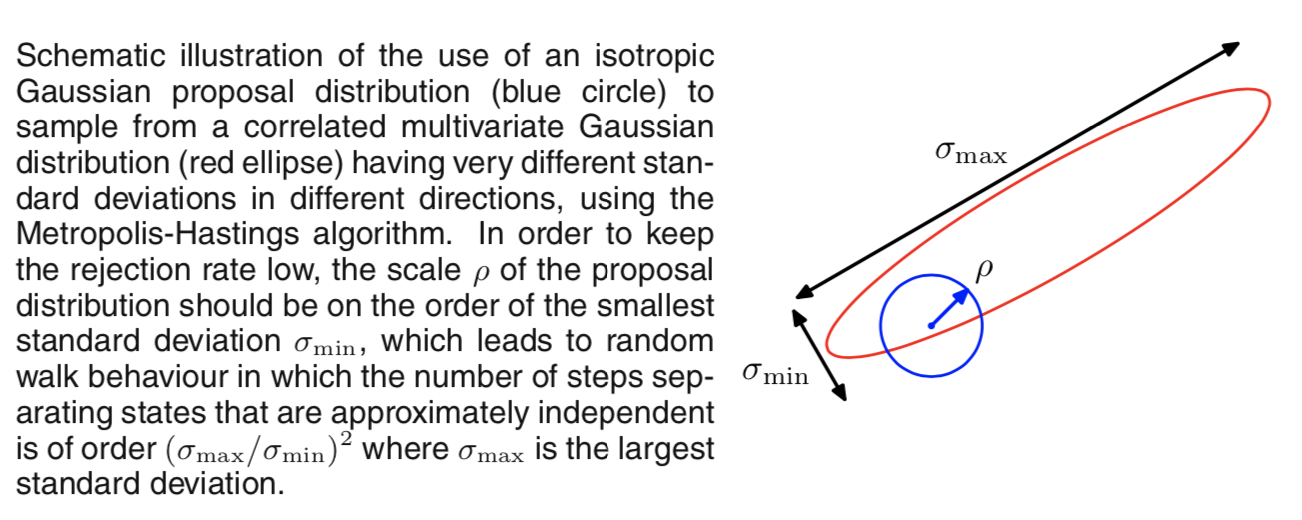

### Will a Markov chain converge to the desired distribution?

For first-order Markov chain

$$
p\left(\mathbf{z}^{(m+1)} \mid \mathbf{z}^{(1)}, \ldots, \mathbf{z}^{(m)}\right)=p\left(\mathbf{z}^{(m+1)} \mid \mathbf{z}^{(m)}\right)
$$

Transition probability
$$T_m(z^{(m)}, z^{(m+1)}) \equiv p(z^{(m+1)} | z^{(m)})$$

A markov chain is called homogeneous if the transition probabilities are the same for all $m$ (stationary probability)

A Markov chain is homogeneous if it satisfies some conditions (in summary, named as ergodic). All states are positive recurrent, apperiodic, and the Markov chain is irreducible.  

For a homogenuous Markov chain with transition probabilities $T(z', z)$, the distributipon $p^*(z)$ is invariant if $$p^*(z) = \sum_{z'}T(z', z) p^*(z')$$

A sufficient condition for ensuring that the required distribution $p(z)$ is invariant is to choose the transition probabilities to satisfy the property of detailed balance,

$$p^*(z) T(z, z') = p^*(z')T(Z', z)$$

because
$$
\sum_{\mathbf{z}^{\prime}} p^{\star}\left(\mathbf{z}^{\prime}\right) T\left(\mathbf{z}^{\prime}, \mathbf{z}\right)=\sum_{\mathbf{z}^{\prime}} p^{\star}(\mathbf{z}) T\left(\mathbf{z}, \mathbf{z}^{\prime}\right)=p^{\star}(\mathbf{z}) \sum_{\mathbf{z}^{\prime}} p\left(\mathbf{z}^{\prime} \mid \mathbf{z}\right)=p^{\star}(\mathbf{z})
$$


## Gibbs Sampling
So far, the problem above sampling from $p(D|w) p(w)$, still cannot be solved, because the number of parameters are more than 1.

Gibbs sampling is dealing with more than one variable sampling.

The key idea of Gibbs sampling is that each step of the Gibbs sampling procedure involves replacing the value of one of the variables by a value drawn from the distribution of that variable conditioned on the values of the remaining variables.

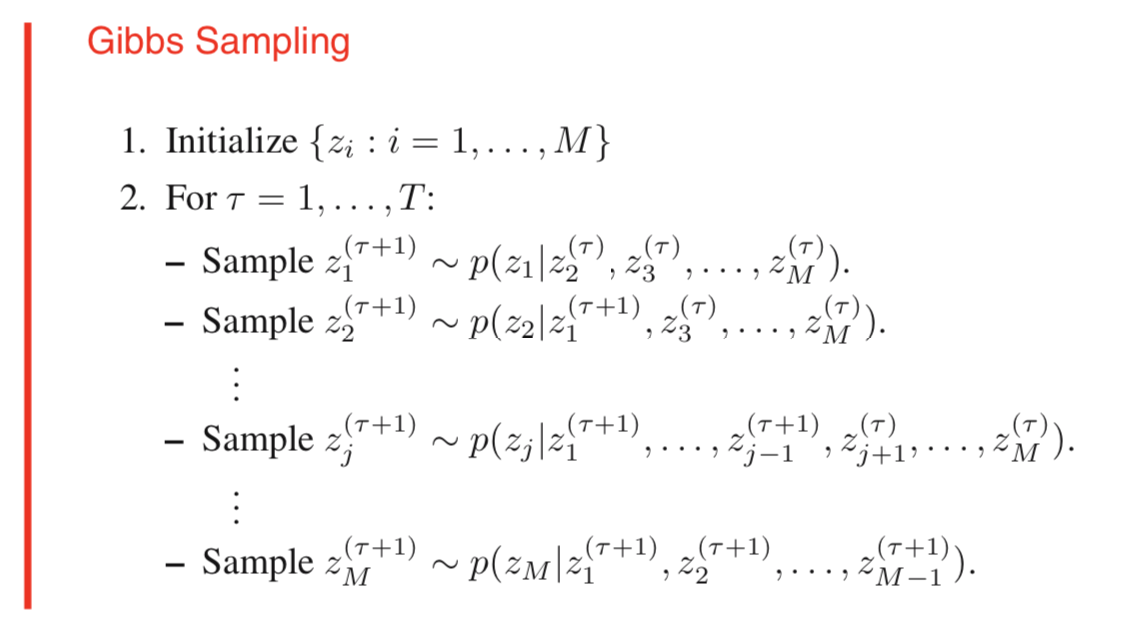

For Gibbs sampling, the conditional distribution of the target function is hard to find, so the actual acceptable probability $A$ is

$$A_k(z_1^*, z^{(\tau)}) = min(1, \frac{\tilde{p}(z_1^*, z_2^{(\tau)}, \dots, z_m^{(\tau)})q_k(z^{(\tau)} | z_1^*, z_2^{(\tau)}, \dots, z_m^{(\tau)})}{\tilde{p}(z^{(\tau)})q_k(z_1^*, z_2^{(\tau)}, \dots, z_m^{(\tau)} | z^{(\tau)})})$$

$$A_k(z_j^*, z^{(\tau)}) = min(1, \frac{\tilde{p}(z_1^{(\tau+1)},\dots, z_{j-1}^{(\tau+1)},z_{j}^{*}, z_{j+1}^{(\tau)}, \dots, z_m^{(\tau)})q_k(z_1^{(\tau+1)},\dots, z_{j-1}^{(\tau+1)},z_{j}^{(\tau)}, z_{j+1}^{(\tau)}, \dots, z_m^{(\tau)} | z_1^{(\tau+1)},\dots, z_{j-1}^{(\tau+1)},z_{j}^{*}, z_{j+1}^{(\tau)}, \dots, z_m^{(\tau)})}{\tilde{p}(z_1^{(\tau+1)},\dots, z_{j-1}^{(\tau+1)},z_{j}^{(\tau)}, z_{j+1}^{(\tau)}, \dots, z_m^{(\tau)})q_k(z_1^{(\tau+1)},\dots, z_{j-1}^{(\tau+1)},z_{j}^{*}, z_{j+1}^{(\tau)}, \dots, z_m^{(\tau)}| z_1^{(\tau+1)},\dots, z_{j-1}^{(\tau+1)},z_{j}^{(\tau)}, z_{j+1}^{(\tau)}, \dots, z_m^{(\tau)})})$$

#### Gibbs sampling has a trick named as over-relaxation
At each step of the Gibbs sampling algorithm, the conditional distribution for a particular component $z_i$ has some mean $\mu_i$ and some variance $\sigma_i^2$. In the over-relaxation frame- work, the value of $z_i$ is replaced with
$$
z_i^{\prime}=\mu_i+\alpha\left(z_i-\mu_i\right)+\sigma_i\left(1-\alpha_i^2\right)^{1 / 2} \nu
$$

where $\nu$ is a Gaussian random variable with zero mean and unit variance, and $\alpha$ is a parameter such that $-1 < \alpha < 1$

The effect of over-relaxation is to encourage directed motion through state space when the variables are highly correlated.

In [ ]:
#define the likelihood function $p(w|D)$ and the prior distribution $p(w)$

#choose conditional Gaussian distribution as the proposal distribution with initialization values w = np.zeros(p)

#Caculate A

#Smaple u

# make decision

#do iteration

#warm up steps

# skips trick

## Slice Sampling

The rest part is the improvement of the MCMC. One thing to improve is the variance of the proposal distribution. When the variance is small, the movement of the sampling location is slow, when the vairance is big, the rejection rate is high.

With slice sampling, target observations are sampled from a joint distribution $p(z, u)$ where $u$ follows a uniform distribution $[0, \tilde{p}(z^{(\tau)})]$

The detailed step is:

1. Sample $z^*$ from the proposal distribution $q(z | z^{(\tau)})$
2. Sample $u$ from uniform distribtuion $[0, \tilde{p}(z^*)]$
3. Sample $z^{(\tau+1)}$ uniformly from the ‘slice’ through the distribution defined by $\{z: \tilde{p}(z) > u\}$

The step 3 is hard to achieve since it is hard to find out the region of the slice. 

In practice, we arbitrarily set up a width $w$, then we add and minus $w$ from $z^*$, until $\tilde{p}(z^* + p_1 w) \leq u$ and $\tilde{p}(z^* - p_2 w) \leq u$,
Then sample $z^{**}$ from uniform distribution $[z^* - p_2 w, z^* + p_1 w]$, if $\tilde{p}(z^{**}) > u$, $z^{(\tau+1)} = z^{**}$, else, the region of the uniform distribution becomes $[max(z^* - p_2 w, z^{**}), z^* + p_1 w]$ or $[z^* - p_2 w, min(z^* + p_1 w, z^{**})]$ depends on either $z^{**} < z^*$ or $z^{**} > z^*$.

## The Hygrid Monte Carlo Algorithm

To be continue...